# Clustering



![](https://raw.githubusercontent.com/tec03/Datasets/main/images/clustering.png)

# Clustering Types
Following are the clustering types of Machine Learning:

1. Hierarchical clustering
2. K-means clustering
3. K-NN (k nearest neighbors)
4. Principal Component Analysis
5. Singular Value Decomposition
6. Independent Component Analysis

# Cluster analisis

* Is an `Unsupervised` Machine Learning algorithm
* Uses to analyze and cluster unlabeled datasets and discover hidden patterns or data groupings without human intervention. 
* Is one of the most common exploratory data analysis techniques used to understand the data structure.

* Clustering methods: 
    * K-means algorithm  (Centroid-based algorithm) 
         * The objective is that to minimize the sum of distances between the data point and their corresponding clusters while associating each group of objects (cluster) with its centroid.
         * splits a dataset into K non-overlapping subgroups (clusters). 

## K-means algorithm 


* K Means is an algorithm for **unsupervised clustering**
    
    * Finding clusters in data based on the data attributes alone (not the labels)

* K Means is a relatively easy-to-understand algorithm
    
    * It searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.



K-means algorithm involves following steps:

1. Define the number of clusters based on given K value
2. Select random K points or `centroid`s (can differ from the input dataset)
3. Form the K clusters by assigning each data point to their closest centroid
4. Calculate the variance and define a new centroids of each cluster
5. Repeat the process from step 3, to reassign each datapoint to the new closest `centroid` of each cluster untill the algorithm finds best possible solution


### The K-Means Algorithm - Expectation Maximization

K-Means is an example of an algorithm which uses an *Expectation-Maximization* approach to arrive at the solution.


*Expectation-Maximization* is a two-step approach which works as follows:

1. Guess some cluster centers
2. Repeat until converged
   A. Assign points to the nearest cluster center
   B. Set the cluster centers to the mean 
   
Let's quickly visualize this process:
     
### Elbow method (Getting value of K) 

 
Choosing the correct value for K is challenging. 
* The algorithm’s performance is dependent on the number of clusters.
* The Elbow method will help to calculate the ideal number of clusters in the dataset.

The Elbow method uses the *Within Cluster Sum of Squares (WCSS)* value to define total variations. 

* A good model is one with low `inertia (WCSS)` AND a low number of `clusters (K)`. 
* However, this is a tradeoff because as `K increases`, `inertia decreases`.

For two clusters:

\begin{equation}
    WCSS = \sum_{p_i \in cluster1}(d(p_i, C1))^2 + \sum_{p_i \in cluster2}(d(p_i, C2))^2
\end{equation}
\begin{align}
    \text{where } C1 & - \text{Centroid of cluster1}\\
                  C2 & - \text{Centroid of cluster2}\\
\end{align}
    
    

Getting optimal value of K (Elbow method) involves following steps:

1. For various `K` values, use the K-means clustering to split the dataset
2. Calculate the `WCSS` value for each `K`
3. It will then plots a curve graph between calculated `WCSS` values and the `Number of clusters (K)`
4. The sharp point of bend (a point of the plot looks like an `elbow`) is the best value for `K`

### KMeans Caveats

* The convergence of this algorithm is not guaranteed
     * For, scikit-learn by default uses a large number of random initializations and finds the best results.

* The number of clusters must be set beforehand.
     * There are other clustering algorithms for which this requirement may be lifted.


     
Let's look at how KMeans operates on the simple clusters 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'https://raw.githubusercontent.com/tec03/Datasets/main/datasets/reg_data.csv'
df = pd.read_csv(path)
df.dropna(inplace = True)
ndf = df[['Age', 'Weight']]
ndf

,Age,Weight
0,33.0,80.0
1,33.0,82.5
2,34.0,100.8
3,42.0,90.0
4,29.0,67.0
5,42.0,60.0
6,50.0,77.0
7,55.0,77.0
8,31.0,87.0
9,46.0,70.0


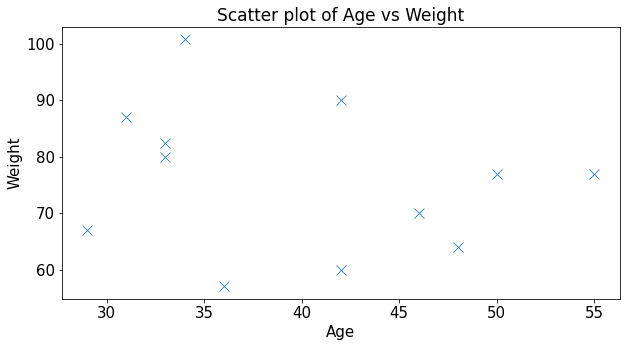

In [3]:
plt.figure(figsize=(10, 5))

pp = sns.scatterplot(x = ndf['Age'], 
                     y = ndf['Weight'],
                     #hue='D', 
                     marker='x',
                     s=100,#size of markers
                     cmap="nipy_spectral"
                    )


#pp.set_facecolor("yellow")
pp.set_xlabel('Age', size = 15)
pp.set_ylabel('Weight', size = 15)

plt.xticks(fontsize =15)
plt.yticks(fontsize =15)


pp.set_title("Scatter plot of Age vs Weight", size = 17)
plt.show()

## KMeans with #clusters=1

In [4]:
from sklearn.cluster import KMeans

# k value assigned to 1
kmeans = KMeans(n_clusters=1, 
                random_state=0
               ) 

# fitting the values
kmeans.fit(ndf)

# Cluster centers
print('Cluster centers : ', kmeans.cluster_centers_)
print('Inertia \t: ', kmeans.inertia_)


Cluster centers :  [[39.91666667 76.025     ]]
Inertia 	:  2655.1991666666668


In [5]:
kmeans.labels_ # the cluster ids. 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [6]:
print('kmeans.cluster_centers_ \t: ', kmeans.cluster_centers_)
print('type of cluster_centers_\t: ', type(kmeans.cluster_centers_))       # we have one array here, since only one cluster
print('kmeans.cluster_centers_[0]\t: ', kmeans.cluster_centers_[0])        # the center of the cluster(here we have only 1)
print('kmeans.cluster_centers_[0][0] \t: ', kmeans.cluster_centers_[0][0]) # The x cordinate
print('kmeans.cluster_centers_[:, 0] \t: ', kmeans.cluster_centers_[:, 0]) # all x cordinates
print('kmeans.cluster_centers_[0][1] \t: ', kmeans.cluster_centers_[0][1]) # The y cordinate
print('kmeans.cluster_centers_[:, 1] \t: ', kmeans.cluster_centers_[:, 1]) # all y cordinates
kmeans.cluster_centers_[:,1]

kmeans.cluster_centers_ 	:  [[39.91666667 76.025     ]]
type of cluster_centers_	:  <class 'numpy.ndarray'>
kmeans.cluster_centers_[0]	:  [39.91666667 76.025     ]
kmeans.cluster_centers_[0][0] 	:  39.916666666666664
kmeans.cluster_centers_[:, 0] 	:  [39.91666667]
kmeans.cluster_centers_[0][1] 	:  76.025
kmeans.cluster_centers_[:, 1] 	:  [76.025]


array([76.025])

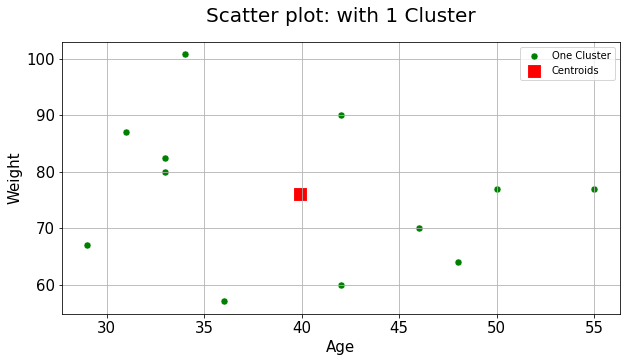

In [7]:
plt.figure(figsize=(10,5))

# visualizing the clusters
fig1 = sns.scatterplot(x = ndf['Age'], 
                y = ndf['Weight'],  
                color = 'g', 
                label = 'One Cluster',
                s=50
               )

fig2 = sns.scatterplot(x = kmeans.cluster_centers_[:, 0], # all x cordinates
                y = kmeans.cluster_centers_[:, 1], # all y cordinates
                color = 'red', 
                label = 'Centroids',
                s=200,
                marker=','
               )

# labeling
plt.grid(True)
fig1.set_xlabel('Age', size = 15)
fig2.set_ylabel('Weight', size = 15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
fig2.set_title("Scatter plot: with 1 Cluster", size = 20, pad=20) #pad the distance from the graph
plt.legend()
plt.show()

## KMeans with #clusters=3

In [8]:
# k value assigned to 3
kmeans = KMeans(n_clusters=3, 
                random_state=0
               ) 

# fitting the values
kmeans.fit(ndf)

# Cluster centers
print('Cluster centers : ', kmeans.cluster_centers_)
print('Inertia \t: ', kmeans.inertia_)

Cluster centers :  [[34.6        88.06      ]
 [49.75       72.        ]
 [35.66666667 61.33333333]]
Inertia 	:  636.3553333333332


In [9]:
kmeans.labels_ # the cluster ids. 

array([0, 0, 0, 0, 2, 2, 1, 1, 0, 1, 2, 1], dtype=int32)

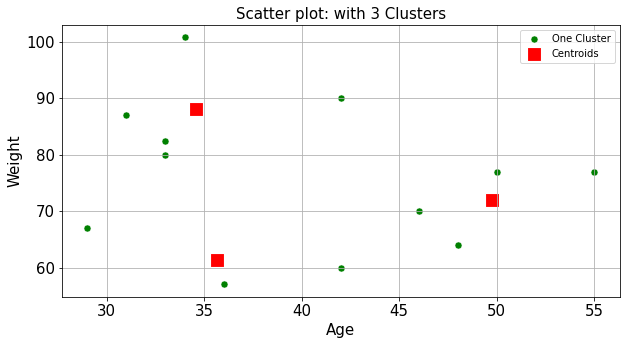

In [10]:
plt.figure(figsize=(10,5))

# visualizing the clusters
fig1 = sns.scatterplot(x = ndf['Age'], 
                y = ndf['Weight'], 
                color = 'g', 
                label = 'One Cluster',
                s=50
               )

cluS = sns.scatterplot(x = kmeans.cluster_centers_[:, 0], 
                y = kmeans.cluster_centers_[:, 1], 
                color = 'red', 
                label = 'Centroids',
                s=200,
                marker=','
               )

# labeling
plt.grid(True)

fig1.set_xlabel('Age', size = 15)
fig1.set_ylabel('Weight', size = 15)

plt.xticks(fontsize =15)
plt.yticks(fontsize =15)

cluS.set_title("Scatter plot: with 3 Clusters", size = 15)

plt.legend()
plt.show()

## Elbow method - To find the optimal number of clusters

In [11]:
from sklearn.cluster import KMeans

wcss = [] # to store WCSS
max_centroids = 13

for i in range(1, max_centroids):
    
    # k-mean cluster model for different k values
    kmeans = KMeans(n_clusters = i, 
                    init = 'k-means++', #Method for initialization:
                    random_state = 42
                   )
    kmeans.fit(ndf)
    
    wcss.append(kmeans.inertia_)# inertia method returns wcss for that model
    print('For i = {}, \t the inertia is : {} '.format(i, kmeans.inertia_))
    

For i = 1, 	 the inertia is : 2655.1991666666668 
For i = 2, 	 the inertia is : 1171.4148571428568 
For i = 3, 	 the inertia is : 636.3553333333332 
For i = 4, 	 the inertia is : 418.2366666666666 
For i = 5, 	 the inertia is : 288.1533333333333 
For i = 6, 	 the inertia is : 173.1533333333333 
For i = 7, 	 the inertia is : 82.83333333333333 
For i = 8, 	 the inertia is : 58.125 
For i = 9, 	 the inertia is : 35.625 
For i = 10, 	 the inertia is : 15.625 
For i = 11, 	 the inertia is : 3.125 
For i = 12, 	 the inertia is : 0.0 


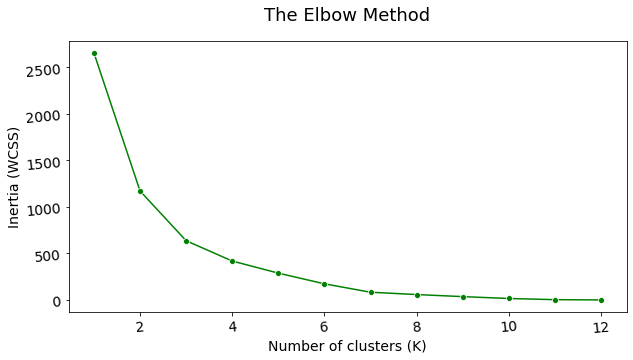

In [12]:
# importing the matplotlib module
import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(10,5))
sns.lineplot(x = range(1, max_centroids), 
             y = wcss,
             marker='o',
             color='green'
            )

# labeling
plt.title('The Elbow Method', fontsize = 18, pad = 20)
plt.xlabel('Number of clusters (K)', fontsize = 14)
plt.ylabel('Inertia (WCSS)', fontsize = 14)
plt.xticks(fontsize = 14, rotation = 5)
plt.yticks(fontsize = 14, rotation = 5)
plt.show()

The best number of clusters for this data is 3. 

## What if with big-data ??

In [13]:
pd.set_option('max_rows', 20)

In [14]:
path = 'https://raw.githubusercontent.com/tec03/Datasets/main/datasets/fb.csv'

In [15]:
data = pd.read_csv(path)
data.head(2)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN


In [16]:
data.shape

(7050, 16)

In [17]:
data.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [18]:
data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [19]:
#data.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True )

data.dropna(how='all', 
            axis = 1, 
            inplace = True
            )
data.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [20]:
x = data.nunique()
x

status_id           7050
status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
dtype: int64

In [21]:
#print(x)
print('x shape \t: ', x.shape[0])
print('x last \t\t: ', x[11])
print('x indices\t: ', x.index)
print('x index[0] \t: ', x.index[0])

x shape 	:  12
x last 		:  14
x indices	:  Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')
x index[0] 	:  status_id


* `Columns` (indices) has unique value 7050, 4, 6913, ... , 14 out of 7050 records in this column. 
* We can’t use those columns with many `duplicates` for clustering. 
* Ignore those columns with many duplicates

In [22]:
for i in range(0, x.shape[0]):
    print(i, '\t', x.index[i], '\t\t', x[i])

0 	 status_id 		 7050
1 	 status_type 		 4
2 	 status_published 		 6913
3 	 num_reactions 		 1067
4 	 num_comments 		 993
5 	 num_shares 		 501
6 	 num_likes 		 1044
7 	 num_loves 		 229
8 	 num_wows 		 65
9 	 num_hahas 		 42
10 	 num_sads 		 24
11 	 num_angrys 		 14


In [23]:
to_be_droped = []
for i in range(0, x.shape[0]):
    #print(i, '\t', x.index[i])
    if x[i] > 6000:
        print(x.index[i], '\t', x[i])
        to_be_droped.append(x.index[i])

status_id 	 7050
status_published 	 6913


In [24]:
to_be_droped

['status_id', 'status_published']

In [25]:
data.drop(columns =to_be_droped, 
         inplace = True
         )
data.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

## Favorite variables to study the correlation: 

In [26]:
favs = ['num_reactions', 'num_hahas', 'num_sads', 'num_angrys']

In [27]:
data.columns
fav = data.loc[:, favs]
fav

,num_reactions,num_hahas,num_sads,num_angrys
0,529,1,1,0
1,150,0,0,0
2,227,1,0,0
3,111,0,0,0
4,213,0,0,0
...,...,...,...,...
7045,89,0,0,0
7046,16,1,0,0
7047,2,0,0,0
7048,351,0,0,0


In [28]:
import seaborn as sns

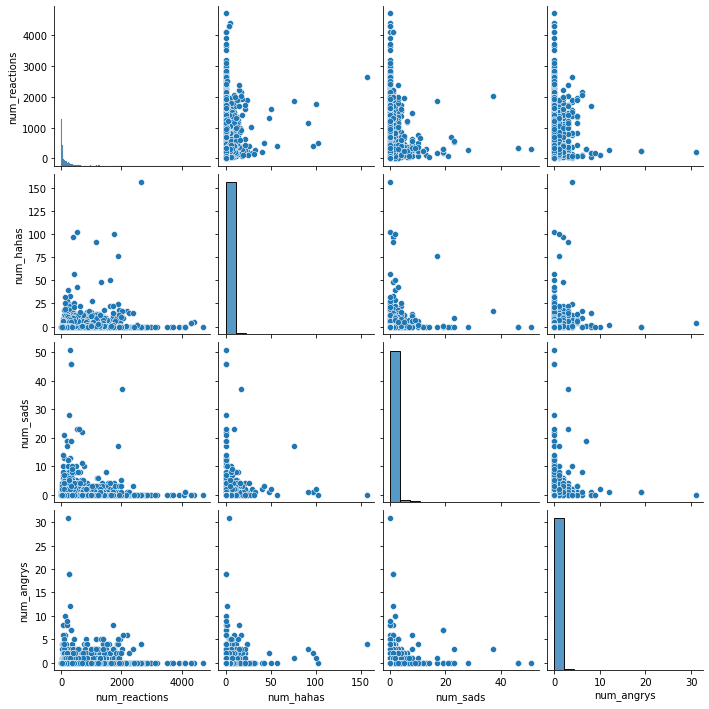

In [29]:
sns.pairplot(fav);

In [30]:
co = fav.corr()
co

,num_reactions,num_hahas,num_sads,num_angrys
num_reactions,1.000000,0.176028,0.075138,0.124326
num_hahas,0.176028,1.000000,0.141421,0.211910
num_sads,0.075138,0.141421,1.000000,0.142072
num_angrys,0.124326,0.211910,0.142072,1.000000


In [31]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

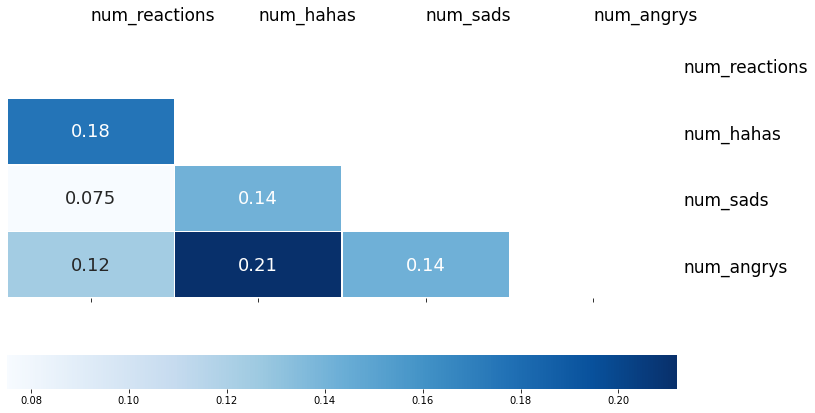

In [32]:
hm = plt.subplots(figsize=(12, 7))
mask1 = np.triu(# tril
                np.ones_like(co, 
                             #dtype=bool
                             )
              )

hm = sns.heatmap(co, 
            linewidth=0.5,
            #cmap="RdYlGn",
            cmap="Blues",
            annot=True, 
            #center=1,
            #xticklabels=False, #2
            #yticklabels=False,
             #cbar=False, 
            cbar_kws={"orientation": "horizontal"},
            annot_kws={"size": 18},#size of numbers inside squares
            mask=mask1# for just a triangle
           )#linewidth lines b/w squares.

hm.set_yticklabels(hm.get_ymajorticklabels(), 
                   fontsize = 17, 
                  )
hm.set_yticklabels(hm.get_ymajorticklabels(), 
                   fontsize = 17, 
                   rotation = 0
                  )
hm.tick_params(#axis='y', 
               #right=True,  # a line will appear if it is true 
               labelleft=False, 
               labelright=True, 
               left = False
              )
#to place the top lables in 'left' position
ylables = hm.get_yticklabels()#which='both')

# for i in ylables:
#     i.set_va('top')

hm.set_xticklabels(hm.get_xmajorticklabels(), 
                   fontsize = 17, 
                   #rotation = 15
                  )
hm.tick_params(#axis='x', 
               #top=True,  # a line will appear if it is true 
               labeltop=True, 
               labelbottom=False,
              #  bottom = False  # removing the line
              )

#to place the top lables in 'left' position
ticklbls = hm.get_xticklabels()#which='both')
for x in ticklbls:
    x.set_ha('left')


In [33]:
from scipy.stats import pearsonr

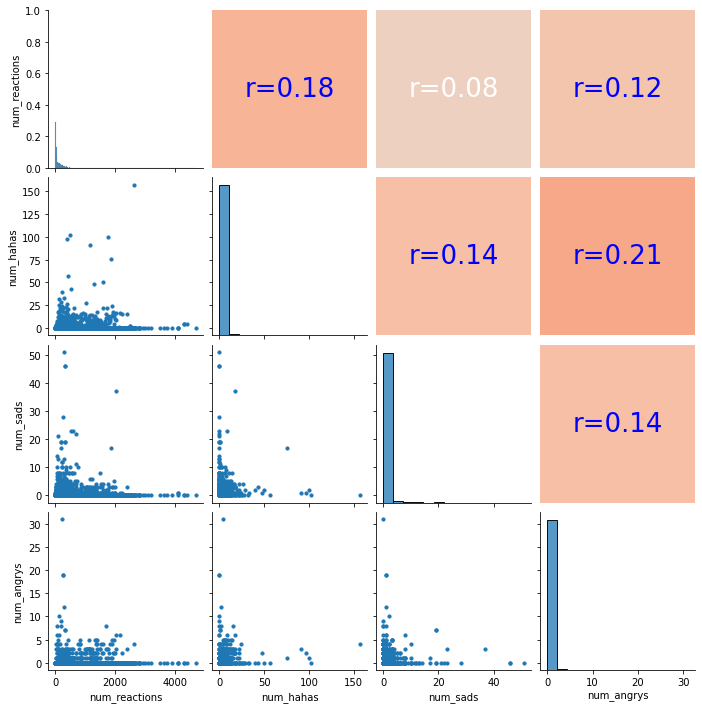

In [34]:
def corrfunc(x, y, **kwds):
    cmap = kwds['cmap']
    norm = kwds['norm']
    ax = plt.gca()
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    sns.despine(ax=ax, bottom=True, top=True, left=True, right=True)
    r, _ = pearsonr(x, y)
    facecolor = cmap(norm(r))
    ax.set_facecolor(facecolor)
    
    lightness = (max(facecolor[:3]) + min(facecolor[:3]) ) / 2
    
    ax.annotate(f"r={r:.2f}", 
                xy=(.5, .5), 
                xycoords=ax.transAxes,
                color='white' if r < 0.1 else 'blue', #text color
                size=26, 
                ha='center', 
                va='center'
                )


g = sns.PairGrid(fav)

g.map_lower(plt.scatter, 
            s=10)

g.map_diag(sns.histplot, 
           kde=False)

g.map_upper(corrfunc, 
            cmap=plt.get_cmap('coolwarm'), #https://matplotlib.org/stable/tutorials/colors/colormaps.html
            norm=plt.Normalize(vmin=-0.5, vmax=0.5)
          )

g.fig.subplots_adjust(wspace=0.06, hspace=0.06) # equal spacing in both directions
plt.show()

In [35]:
# to check corr with the graph
fav.corr().round(2)

,num_reactions,num_hahas,num_sads,num_angrys
num_reactions,1.00,0.18,0.08,0.12
num_hahas,0.18,1.00,0.14,0.21
num_sads,0.08,0.14,1.00,0.14
num_angrys,0.12,0.21,0.14,1.00


## Converting the **non-numeric** to **numeric values**

The `K-means algorithm` requires `numeric data` as an input

In [36]:
data['status_type']

0       video
1       photo
2       video
3       photo
4       photo
        ...  
7045    photo
7046    photo
7047    photo
7048    photo
7049    photo
Name: status_type, Length: 7050, dtype: object

Replacing the `status_type` column values with the numeric values:

In [37]:
from sklearn.preprocessing import LabelEncoder

y = data['status_type']

le = LabelEncoder()

In [38]:
data['status_type'] = le.fit_transform(data['status_type'])

In [39]:
data['status_type']

0       3
1       1
2       3
3       1
4       1
       ..
7045    1
7046    1
7047    1
7048    1
7049    1
Name: status_type, Length: 7050, dtype: int64

In [40]:
data.head(11)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
5,1,217,6,0,211,5,1,0,0,0
6,3,503,614,72,418,70,10,2,0,3
7,3,295,453,53,260,32,1,1,0,1
8,1,203,1,0,198,5,0,0,0,0
9,1,170,9,1,167,3,0,0,0,0


## Dataset in two clusters:

In [41]:
df = data

In [42]:
from sklearn.cluster import KMeans

# k value assigned to 2
kmeans = KMeans(n_clusters=2, 
                random_state=0
               ) 

# fitting the values
kmeans.fit(df)

# Cluster centers
print('Cluster centers \t: ', kmeans.cluster_centers_)
print('\nInertia \t: ', kmeans.inertia_)

Cluster centers 	:  [[1.67882472e+00 2.24142278e+02 1.22109857e+02 3.08061948e+01
  2.11227529e+02 1.09083804e+01 1.15298886e+00 5.56809958e-01
  1.97423650e-01 9.63960052e-02]
 [2.98581560e+00 5.22886525e+02 5.23441844e+03 4.91624113e+02
  4.02007092e+02 1.01921986e+02 7.97163121e+00 7.53900709e+00
  2.51063830e+00 9.36170213e-01]]

Inertia 	:  4986397875.914598


NB: The smaller the `inertia value` will be, the better the algorithm performs.

> What is `inertia value`?? 

> `Inertia value` is the distance between each `data point` and `its centroid`, squaring this distance, and summing these squares across one cluster.


The inertia (4986397875.914609), is a high value,  which means our model is not performing well.

How many data points have been classified correctly.?


In [43]:
y = le.transform(y) # y = (data['status_type']), done just before the LabelEncoder
y

array([3, 1, 3, ..., 1, 1, 1])

In [44]:
# stroing labels
labels = kmeans.labels_
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [45]:
# check how many of the samples were correctly labeled
correct_labels_y = sum(y == labels) # no reason for y itself, can be any column of df. 
correct_labels_y

64

In [46]:
# printing the results
print("Result: %d out of %d samples were correctly labeled." % (correct_labels_y, y.size))

Result: 64 out of 7050 samples were correctly labeled.


In [47]:
df.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

In [48]:
correct_labels_y = sum(df['num_reactions'] == labels) # no reason for 'num_reactions' itself, can be any column of df. 
print("Result: %d out of %d samples were correctly labeled." % (correct_labels_y, y.size))

Result: 121 out of 7050 samples were correctly labeled.


In [49]:
correct_labels_y = sum(df['num_likes'] == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels_y, y.size))

Result: 126 out of 7050 samples were correctly labeled.


## The best `K value`?  (Use `Elbow algorithm`)

In [50]:
from sklearn.cluster import KMeans

wcss = []
centroids_count = 14

for i in range(1, centroids_count):
    
    # k-mean cluster model for different k values
    kmeans = KMeans(n_clusters = i, 
                    init = 'k-means++', #Method for initialization:
                    random_state = 42
                   )
    kmeans.fit(df)
    
    wcss.append(kmeans.inertia_)# inertia method returns wcss for that model
    print('For i = {}, \t the wcss is :{} '.format(i, kmeans.inertia_))

For i = 1, 	 the wcss is :8645692195.266678 
For i = 2, 	 the wcss is :4986397875.914598 
For i = 3, 	 the wcss is :2735263885.7707624 
For i = 4, 	 the wcss is :2000980738.6639442 
For i = 5, 	 the wcss is :1469929375.1750798 
For i = 6, 	 the wcss is :1186926100.5944695 
For i = 7, 	 the wcss is :923406623.6504002 
For i = 8, 	 the wcss is :749947148.8579664 
For i = 9, 	 the wcss is :621424725.9655619 
For i = 10, 	 the wcss is :523198059.74937046 
For i = 11, 	 the wcss is :450185197.9119145 
For i = 12, 	 the wcss is :379180111.91259325 
For i = 13, 	 the wcss is :329325545.9178824 


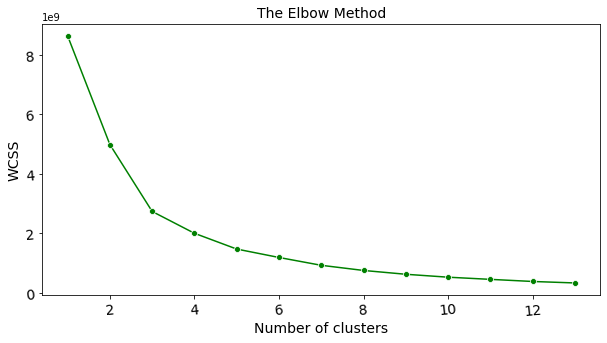

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.lineplot(x = range(1, centroids_count), 
             y = wcss,
             marker='o',
             color='green'
            )

# labeling
plt.title('The Elbow Method', fontsize = 14)
plt.xlabel('Number of clusters', fontsize = 14)
plt.ylabel('WCSS', fontsize = 14)
plt.xticks(fontsize = 14, rotation = 5)
plt.yticks(fontsize = 14, rotation = 5)
plt.show()

In [52]:
data['status_type'].unique()
data.columns
#data.shape

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

In [53]:
testData = data.head(10)
testData = testData.drop('status_type', #in this case, x axis the 'num_reactions', y will be 2nd column (then 3rd, ...)
                         axis = 1
                         ) 
testData

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0
5,217,6,0,211,5,1,0,0,0
6,503,614,72,418,70,10,2,0,3
7,295,453,53,260,32,1,1,0,1
8,203,1,0,198,5,0,0,0,0
9,170,9,1,167,3,0,0,0,0


In [54]:
kmeans = KMeans(n_clusters = 3, # k-mean algorithm
                random_state = 42
               )
kmeans

KMeans(n_clusters=3, random_state=42)

In [55]:
y_kmeans = kmeans.fit_predict(testData) # will say, each point of df belongs to which cluster. 
y_kmeans # the id of the clusters. 0 -> the first data belongs cluster 0, 1 -> belongs cluter 1, etc. 

array([0, 1, 2, 1, 1, 1, 0, 2, 1, 1], dtype=int32)

In [56]:
y_kmeans.shape # the number of rows

(10,)

In [57]:
X = np.array(testData) #copying the data to variable X
X # remmember, we are studying only first two columns 

array([[529, 512, 262, 432,  92,   3,   1,   1,   0],
       [150,   0,   0, 150,   0,   0,   0,   0,   0],
       [227, 236,  57, 204,  21,   1,   1,   0,   0],
       [111,   0,   0, 111,   0,   0,   0,   0,   0],
       [213,   0,   0, 204,   9,   0,   0,   0,   0],
       [217,   6,   0, 211,   5,   1,   0,   0,   0],
       [503, 614,  72, 418,  70,  10,   2,   0,   3],
       [295, 453,  53, 260,  32,   1,   1,   0,   1],
       [203,   1,   0, 198,   5,   0,   0,   0,   0],
       [170,   9,   1, 167,   3,   0,   0,   0,   0]])

In [58]:
X[0] # the first row of the df
X[:, 0] # the first column of the df 

array([529, 150, 227, 111, 213, 217, 503, 295, 203, 170])

[529 503]
[512 614]


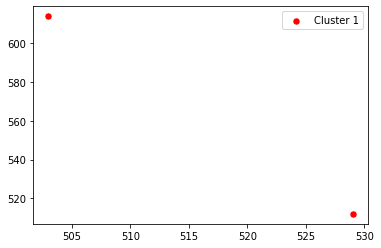

In [59]:
x = X[y_kmeans == 0, 0]
y = X[y_kmeans == 0, 1]
print(x) # the first column of the df, but it belongs to cluster0. 
print(y) # the second column of the df, but it belongs to cluster0.
sns.scatterplot(x = x, #y_kmeans == 0 for Cluster 1; column 0
                y = y, #y_kmeans == 0 for Cluster 1; column 1
                color = 'red', 
                label = 'Cluster 1',
                s=50
               );

[150 111 213 217 203 170]
[0 0 0 6 1 9]


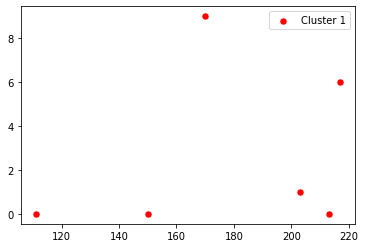

In [60]:
x = X[y_kmeans == 1, 0]
y = X[y_kmeans == 1, 1]
print(x) # the first column of the df, but it belongs to cluster0. 
print(y) # the second column of the df, but it belongs to cluster0.
sns.scatterplot(x = x, #y_kmeans == 0 for Cluster 1; column 0
                y = y, #y_kmeans == 0 for Cluster 1; column 1
                color = 'red', 
                label = 'Cluster 1',
                s=50
               );

[227 295]
[236 453]


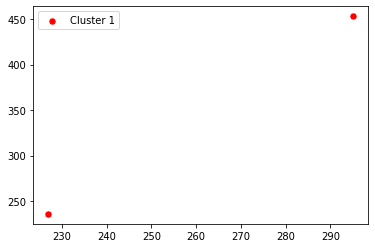

In [61]:
x = X[y_kmeans == 2, 0] #y_kmeans == 2 for Cluster 2;
y = X[y_kmeans == 2, 1] #y_kmeans == 2 for Cluster 2;
print(x) # the first column of the df, but it belongs to cluster0. 
print(y) # the second column of the df, but it belongs to cluster0.
sns.scatterplot(x = x,  
                y = y,
                color = 'red', 
                label = 'Cluster 1',
                s=50
               );

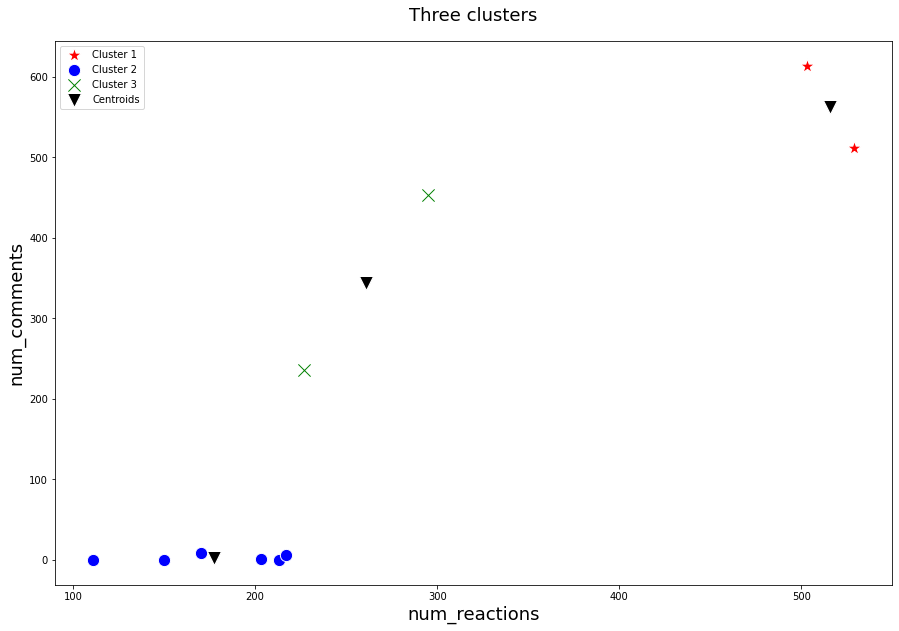

In [62]:
plt.figure(figsize=(15,10))

# visualizing the clusters (remmember, we are studying only first two columns)

sns.scatterplot(x = X[y_kmeans == 0, 0], #y_kmeans == 0 for Cluster 1; column 0
                y = X[y_kmeans == 0, 1], #y_kmeans == 0 for Cluster 1; column 1
                color = 'red', 
                label = 'Cluster 1',
                s=250,
                marker='*'
               )

sns.scatterplot(x = X[y_kmeans == 1, 0], #y_kmeans == 1 for Cluster 2; column 0
                y = X[y_kmeans == 1, 1], #y_kmeans == 1 for Cluster 2; column 1
                color = 'blue', 
                label = 'Cluster 2',
                marker='o',
                s=150
               )

sns.scatterplot(x = X[y_kmeans == 2, 0], #y_kmeans == 2 for Cluster 3; column 0
                y = X[y_kmeans == 2, 1], #y_kmeans == 2 for Cluster 3; column 1
                color = 'green', 
                label = 'Cluster 3',
                marker='x',
                s=150
               )

sns.scatterplot(x = kmeans.cluster_centers_[:, 0], #; column 0 
                y = kmeans.cluster_centers_[:, 1], #; column 1
                color = 'black', 
                label = 'Centroids',
                s=200,
                marker='v'
               )

# labeling
# plt.grid(False)
plt.title('Three clusters', fontsize =18, pad = 20)
plt.xlabel('num_reactions',fontsize =18)
plt.ylabel('num_comments', fontsize =18)
plt.legend()
plt.show()

In [63]:
y = testData['num_likes']
# stroing labels
labels = kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels_y = sum(y == labels) # no reason for y itself, can be any column of df. 
correct_labels_y
# printing the results
print("Result: %d out of %d samples were correctly labeled." % (correct_labels_y, y.size))

Result: 0 out of 10 samples were correctly labeled.


In [64]:
print(labels)
print(y)

[0 1 2 1 1 1 0 2 1 1]
0    432
1    150
2    204
3    111
4    204
5    211
6    418
7    260
8    198
9    167
Name: num_likes, dtype: int64


In [65]:
testData

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0
5,217,6,0,211,5,1,0,0,0
6,503,614,72,418,70,10,2,0,3
7,295,453,53,260,32,1,1,0,1
8,203,1,0,198,5,0,0,0,0
9,170,9,1,167,3,0,0,0,0


### The entire df:

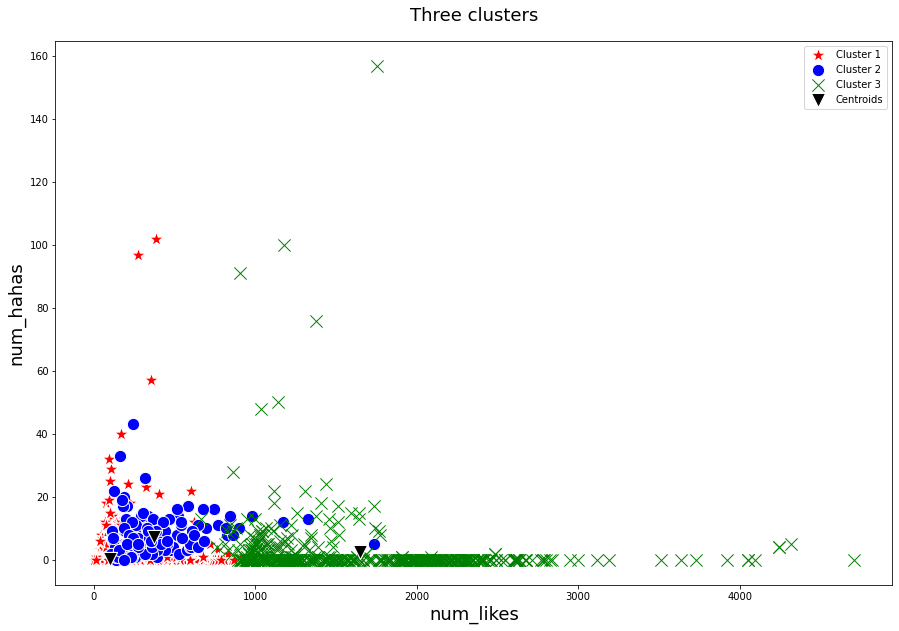

In [66]:
testData2 = data
testData2 = testData2.drop('status_type', #in this case, x axis the 'num_reactions', y will be 2nd column (then 3rd, ...)
                         axis = 1
                         ) 
kmeans = KMeans(n_clusters = 3, # k-mean algorithm
                random_state = 42
               )
y_kmeans = kmeans.fit_predict(testData2) # will say, each point of df belongs to which cluster. 
y_kmeans # the id of the clusters. 0 -> the first data belongs cluster 0, 1 -> belongs cluter 1, etc. 

X = np.array(testData2) #copying the data to variable X
#X # remmember, we are studying only first two columns 

 
plt.figure(figsize=(15,10))

# visualizing the clusters (remmember, we are studying only first two columns)

sns.scatterplot(x = X[y_kmeans == 0, 3], #y_kmeans == 0 for Cluster 1; column 0
                y = X[y_kmeans == 0, 6], #y_kmeans == 0 for Cluster 1; column 1
                color = 'red', 
                label = 'Cluster 1',
                s=250,
                marker='*'
               )

sns.scatterplot(x = X[y_kmeans == 1, 3], #y_kmeans == 1 for Cluster 2; column 0
                y = X[y_kmeans == 1, 6], #y_kmeans == 1 for Cluster 2; column 1
                color = 'blue', 
                label = 'Cluster 2',
                marker='o',
                s=150
               )

sns.scatterplot(x = X[y_kmeans == 2, 3], #y_kmeans == 2 for Cluster 3; column 0
                y = X[y_kmeans == 2, 6], #y_kmeans == 2 for Cluster 3; column 1
                color = 'green', 
                label = 'Cluster 3',
                marker='x',
                s=150
               )

sns.scatterplot(x = kmeans.cluster_centers_[:, 3], #; column 0 
                y = kmeans.cluster_centers_[:, 6], #; column 1
                color = 'black', 
                label = 'Centroids',
                s=200,
                marker='v'
               )

# labeling
# plt.grid(False)
plt.title('Three clusters', fontsize =18, pad = 20)
plt.xlabel('num_likes',fontsize =18)
plt.ylabel('num_hahas', fontsize =18)
plt.legend()
plt.show()

In [67]:
labels = kmeans.labels_
correct_labels_y = sum(testData2['num_likes'] == labels) # no reason for 'num_reactions' itself, can be any column of df. 
print("Result: %d out of %d samples were correctly labeled." % (correct_labels_y, y.size))

Result: 126 out of 10 samples were correctly labeled.


In [68]:
y = testData2['num_likes']
for i in range(testData2['num_likes'].size-1):
  if (y[i] != labels[i]):
    print(y[i],labels[i])

Streaming output truncated to the last 5000 lines.
34 0
50 0
47 0
64 0
40 0
58 0
67 0
50 0
53 0
67 0
90 0
60 0
30 0
52 0
5 0
56 0
26 0
71 0
53 0
35 0
31 0
45 0
20 0
3 0
48 0
18 0
56 0
64 0
63 0
40 0
92 0
53 0
33 0
84 0
87 0
26 0
22 0
78 0
67 0
26 0
14 0
18 0
24 0
27 0
30 0
34 0
26 0
38 0
55 0
80 0
33 0
44 0
41 0
30 0
34 0
30 0
38 0
24 0
37 0
18 0
55 0
54 0
67 0
94 0
41 0
36 0
65 0
90 0
42 0
48 0
45 0
47 0
31 0
105 0
48 0
37 0
5 0
11 0
27 0
2 0
43 0
46 0
53 0
10 0
22 0
12 0
50 0
47 0
14 0
1 0
25 0
16 0
46 0
76 0
16 0
40 0
83 0
89 0
30 0
12 0
52 0
58 0
22 0
6 0
30 0
58 0
32 0
48 0
43 0
30 0
41 0
42 0
59 0
17 0
47 0
14 0
12 0
30 0
25 0
4 0
3 0
5 0
2 0
11 0
38 0
13 0
19 0
15 0
21 0
42 0
12 0
19 0
24 0
32 0
15 0
22 0
33 0
11 0
47 0
41 0
29 0
48 0
13 0
32 0
42 0
26 0
67 0
23 0
33 0
25 0
22 0
26 0
38 0
50 0
29 0
26 0
25 0
15 0
18 0
28 0
14 0
20 0
17 0
34 0
17 0
40 0
21 0
14 0
43 0
27 0
35 0
24 0
30 0
21 0
41 0
15 0
27 0
22 0
36 0
10 0
24 0
19 0
63 0
47 0
57 0
14 0
35 0
12 0
15 0
31 0
45 0
35 

In [69]:
testData.columns

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

Let's see how accurate our K-Means classifier is **with no label information:**

In [70]:
y = (data['num_likes']) 
# stroing labels
labels = kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels_y = sum(y == labels) # no reason for y itself, can be any column of df. 
correct_labels_y
# printing the results
print("Result: %d out of %d samples were correctly labeled." % (correct_labels_y, y.size))

Result: 126 out of 7050 samples were correctly labeled.


In [71]:
126/7050

0.017872340425531916

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y, labels)

0.017872340425531916

~ 1.7% – bad! 

### The confusion matrix for this:

[[126   0   0 ...   0   0   0]
 [128   0   0 ...   0   0   0]
 [127   0   0 ...   0   0   0]
 ...
 [  0   0   2 ...   0   0   0]
 [  0   0   1 ...   0   0   0]
 [  0   0   1 ...   0   0   0]]


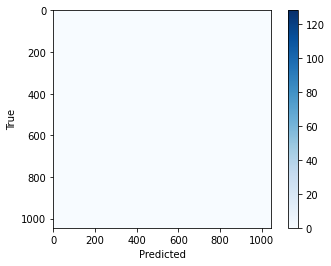

In [73]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, labels))

plt.imshow(confusion_matrix(y, labels),
           cmap='Blues', 
           interpolation='nearest'
           )
plt.colorbar()
plt.grid(False)
plt.ylabel('True')
plt.xlabel('Predicted');

This is a classification strategy, which is an entirely unsupervised estimator which knew nothing about the labels.

<!--NAVIGATION-->
< [previous](prev) | [Contents](toc.ipynb) | [next](next.ipynb) >